In [1]:
import numpy as np
import pandas as pd

In [2]:
# Get The data
raw_data = pd.read_csv(('weatherAUS.csv'))
raw_data.info()
raw_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(145460, 23)

In [3]:
# Checking all the null vals
raw_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
# filling all the null values from the numerical data with their respective mean value
# This method is taken from a kaggle code, but we have some different names, but 
# I think i'ts okey to use the same method.

raw_data['MinTemp']=raw_data['MinTemp'].fillna(raw_data['MinTemp'].mean())
raw_data['MaxTemp']=raw_data['MaxTemp'].fillna(raw_data['MaxTemp'].mean())
raw_data['Rainfall']=raw_data['Rainfall'].fillna(raw_data['Rainfall'].mean())
raw_data['Evaporation']=raw_data['Evaporation'].fillna(raw_data['Evaporation'].mean())
raw_data['Sunshine']=raw_data['Sunshine'].fillna(raw_data['Sunshine'].mean())
raw_data['WindGustSpeed']=raw_data['WindGustSpeed'].fillna(raw_data['WindGustSpeed'].mean())
raw_data['WindSpeed9am']=raw_data['WindSpeed9am'].fillna(raw_data['WindSpeed9am'].mean())
raw_data['WindSpeed3pm']=raw_data['WindSpeed3pm'].fillna(raw_data['WindSpeed3pm'].mean())
raw_data['Humidity9am']=raw_data['Humidity9am'].fillna(raw_data['Humidity9am'].mean())
raw_data['Humidity3pm']=raw_data['Humidity3pm'].fillna(raw_data['Humidity3pm'].mean())
raw_data['Pressure9am']=raw_data['Pressure9am'].fillna(raw_data['Pressure9am'].mean())
raw_data['Pressure3pm']=raw_data['Pressure3pm'].fillna(raw_data['Pressure3pm'].mean())
raw_data['Cloud9am']=raw_data['Cloud9am'].fillna(raw_data['Cloud9am'].mean())
raw_data['Cloud3pm']=raw_data['Cloud3pm'].fillna(raw_data['Cloud3pm'].mean())
raw_data['Temp9am']=raw_data['Temp9am'].fillna(raw_data['Temp9am'].mean())
raw_data['Temp3pm']=raw_data['Temp3pm'].fillna(raw_data['Temp3pm'].mean())    

In [5]:
# Filling all the null values from the categorical data with their most frequently occurring value
raw_data['WindGustDir']=raw_data['WindGustDir'].fillna(raw_data['WindGustDir'].mode()[0])
raw_data['WindDir9am']=raw_data['WindDir9am'].fillna(raw_data['WindDir9am'].mode()[0])
raw_data['WindDir3pm']=raw_data['WindDir3pm'].fillna(raw_data['WindDir3pm'].mode()[0])
raw_data['RainToday']=raw_data['RainToday'].fillna(raw_data['RainToday'].mode()[0])
raw_data['RainTomorrow']=raw_data['RainTomorrow'].fillna(raw_data['RainTomorrow'].mode()[0])

In [6]:
raw_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [7]:
# making categorical yes and no to 1 and 0 respectivevly
raw_data['RainTomorrow']=raw_data['RainTomorrow'].map({'Yes':1,'No':0})
raw_data['RainToday']=raw_data['RainToday'].map({'Yes':1,'No':0})

In [8]:
# from date convert to day, month
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['day']=raw_data['Date'].dt.day
raw_data['month']=raw_data['Date'].dt.month
#drop date
raw_data.drop('Date',axis=1,inplace=True)

In [9]:
raw_data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,12
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,12
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,12
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,12
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,12


In [10]:
raw_data=pd.get_dummies(raw_data)
index = raw_data.columns.get_loc('RainTomorrow')
print(index)

17


In [11]:
raw_data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


### Principal components analysis

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

raw_data_pp = StandardScaler().fit_transform(raw_data)
pca = PCA().fit(raw_data_pp)

# The PCA object offers convenient ways of accessing the
# principal directions and explained variance
pca.components_;
pca.explained_variance_;

# To get the principal components, the `transform` method of the
# PCA object can be used
principal_components_pca = pca.transform(raw_data_pp)

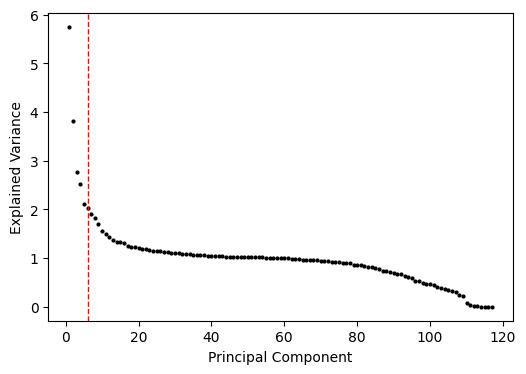

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(6, linestyle="dashed", color="red", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");

Looking at the screen plot, a good cut-off is after 5 principal components, since 5 and 6 are very close. So we could keep the first six columns of principal_components.

### Mislabel the dataset

In [14]:
import pandas as pd
import numpy as np

# Get three copies of the original data set to mislabel in three different levels
mislabel_data1 = raw_data.copy()
mislabel_data2 = raw_data.copy()
mislabel_data3 = raw_data.copy()

# Define the percentage of labels to be swapped
mislabeling_level1 = 45
mislabeling_level2 = 50
mislabeling_level3 = 55

# Convert the labels to a numpy array for easier manipulation
misclass_labels = np.array(raw_data['RainTomorrow'])

# Calculate the number of labels to swap based on the percentage
n_swap1 = int(len(misclass_labels) * mislabeling_level1 / 100)
n_swap2 = int(len(misclass_labels) * mislabeling_level2 / 100)
n_swap3 = int(len(misclass_labels) * mislabeling_level3 / 100)

# Randomly select the indices of the labels to be swapped
swap_indices1 = np.random.choice(len(misclass_labels), n_swap1, replace=False)
swap_indices2 = np.random.choice(len(misclass_labels), n_swap2, replace=False)
swap_indices3 = np.random.choice(len(misclass_labels), n_swap3, replace=False)

# Swap the labels at the selected indices to their opposite values
misclass_labels1 = misclass_labels.copy()
misclass_labels1[swap_indices1] = 1 - misclass_labels1[swap_indices1]

misclass_labels2 = misclass_labels.copy()
misclass_labels2[swap_indices2] = 1 - misclass_labels2[swap_indices2]

misclass_labels3 = misclass_labels.copy()
misclass_labels3[swap_indices3] = 1 - misclass_labels3[swap_indices3]

# Create new data frames from the modified label arrays
mislabel_data1['RainTomorrow'] = pd.DataFrame(misclass_labels1, columns=['RainTomorrow'])
mislabel_data2['RainTomorrow'] = pd.DataFrame(misclass_labels2, columns=['RainTomorrow'])
mislabel_data3['RainTomorrow'] = pd.DataFrame(misclass_labels3, columns=['RainTomorrow'])

In [15]:
#label are the value we want to predict
labels=raw_data['RainTomorrow']

#remove the label from the features
raw_data=raw_data.drop('RainTomorrow',axis=1)
mislabel_data1 = mislabel_data1.drop('RainTomorrow',axis=1)
mislabel_data2 = mislabel_data2.drop('RainTomorrow',axis=1)
mislabel_data3 = mislabel_data3.drop('RainTomorrow',axis=1)


#saving feature name 
feature_list=list(raw_data.columns)

### Splitting the data into training and test split

In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Split to get unaltered test set
train_features, test_features, train_labels, test_labels = train_test_split(raw_data, labels, stratify=labels, test_size=0.20, random_state=42)

# Split to get 3 training sets with mislabeled data
train_features1, _, train_labels1, _ = train_test_split(mislabel_data1, misclass_labels1, stratify=labels, test_size=0.20, random_state=42)
train_features2, _, train_labels2, _ = train_test_split(mislabel_data2, misclass_labels2, stratify=labels, test_size=0.20, random_state=42)
train_features3, _, train_labels3, _ = train_test_split(mislabel_data3, misclass_labels3, stratify=labels, test_size=0.20, random_state=42)

In [31]:
# pca
pca = PCA(n_components=5)
train_features_pca0 = pca.fit_transform(train_features)
test_features_pca = pca.fit_transform(test_features)

# Dirty data
train_features_pca1 = pca.fit_transform(train_features1)
train_features_pca2 = pca.fit_transform(train_features2)
train_features_pca3 = pca.fit_transform(train_features3)

## KNN

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

***Performing cross validation to get best k value***

In [19]:
from sklearn.model_selection import cross_validate
k_s = np.linspace(1, 50, num=50, dtype=int)
best_k = 0
best_score = 0
iteration = 0
scoring = ['f1_macro', 'accuracy', 'roc_auc']

for k in k_s:
    iteration += 1
    print(f'Iteration {iteration}')
    
    model = neighbors.KNeighborsClassifier(k, weights='uniform')
    model.fit(train_features_pca0, train_labels)
    cv_scores = cross_validate(model, train_features_pca0, train_labels, cv=10, scoring=scoring)
    meaned_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
    
    if meaned_score > best_score:
        best_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
        best_k = k
        print(f"Current best k = {best_k}, F1 Macro: {np.mean(cv_scores['test_f1_macro'])}, Accuracy: {np.mean(cv_scores['test_accuracy'])}, ROC AUC: {np.mean(cv_scores['test_roc_auc'])}")

Iteration 1


KeyboardInterrupt: 

In [20]:
best_k = 41 #Best k found to be 41 through cross-validation
iterations = 10

# Create empty lists for the scores
knn1_f1_scores = []
knn1_accuracy_scores = []
knn1_roc_auc_scores = []

knn2_f1_scores = []
knn2_accuracy_scores = []
knn2_roc_auc_scores = []

knn3_f1_scores = []
knn3_accuracy_scores = []
knn3_roc_auc_scores = []

for i in range(iterations):
    # Train a K-nearest neighbor classifier on the projected data for the three different levels
    knn1 = KNeighborsClassifier(n_neighbors=best_k).fit(train_features_pca1, train_labels1)
    knn2 = KNeighborsClassifier(n_neighbors=best_k).fit(train_features_pca2, train_labels2)
    knn3 = KNeighborsClassifier(n_neighbors=best_k).fit(train_features_pca3, train_labels3)


    """
    First level
    """
    # predict the class labels for the test set
    y_pred = knn1.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    knn1_f1_scores.append(f1_score(test_labels, y_pred))
    knn1_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    knn1_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Second level
    """
    # predict the class labels for the test set
    y_pred = knn2.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    knn2_f1_scores.append(f1_score(test_labels, y_pred))
    knn2_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    knn2_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Third level
    """
    # predict the class labels for the test set
    y_pred = knn3.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    knn3_f1_scores.append(f1_score(test_labels, y_pred))
    knn3_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    knn3_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))
    

knn1_f1 = np.mean(knn1_f1_scores)
knn1_accuracy = np.mean(knn1_accuracy_scores)
knn1_roc_auc = np.mean(knn1_roc_auc_scores)

knn2_f1 = np.mean(knn2_f1_scores)
knn2_accuracy = np.mean(knn2_accuracy_scores)
knn2_roc_auc = np.mean(knn2_roc_auc_scores)

knn3_f1 = np.mean(knn3_f1_scores)
knn3_accuracy = np.mean(knn3_accuracy_scores)
knn3_roc_auc = np.mean(knn3_roc_auc_scores)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
# Create empty lists for the scores
log1_f1_scores = []
log1_accuracy_scores = []
log1_roc_auc_scores = []

log2_f1_scores = []
log2_accuracy_scores = []
log2_roc_auc_scores = []

log3_f1_scores = []
log3_accuracy_scores = []
log3_roc_auc_scores = []

for i in range(iterations):
    # Train a Logistic Regression classifier on the projected data for the three different levels
    LogReg1 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0)).fit(train_features_pca1, train_labels1)
    LogReg2 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0)).fit(train_features_pca2, train_labels2)
    LogReg3 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0)).fit(train_features_pca3, train_labels3)


    """
    First level
    """
    # predict the class labels for the test set
    y_pred = LogReg1.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    log1_f1_scores.append(f1_score(test_labels, y_pred))
    log1_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    log1_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Second level
    """
    # predict the class labels for the test set
    y_pred = LogReg2.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    log2_f1_scores.append(f1_score(test_labels, y_pred))
    log2_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    log2_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Third level
    """
    # predict the class labels for the test set
    y_pred = LogReg3.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    log3_f1_scores.append(f1_score(test_labels, y_pred))
    log3_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    log3_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))
    

log1_f1 = np.mean(log1_f1_scores)
log1_accuracy = np.mean(log1_accuracy_scores)
log1_roc_auc = np.mean(log1_roc_auc_scores)

log2_f1 = np.mean(log2_f1_scores)
log2_accuracy = np.mean(log2_accuracy_scores)
log2_roc_auc = np.mean(log2_roc_auc_scores)

log3_f1 = np.mean(log3_f1_scores)
log3_accuracy = np.mean(log3_accuracy_scores)
log3_roc_auc = np.mean(log3_roc_auc_scores)

# LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
# Create empty lists for the scores
lda1_f1_scores = []
lda1_accuracy_scores = []
lda1_roc_auc_scores = []

lda2_f1_scores = []
lda2_accuracy_scores = []
lda2_roc_auc_scores = []

lda3_f1_scores = []
lda3_accuracy_scores = []
lda3_roc_auc_scores = []

for i in range(iterations):
    # Train an LDA classifier on the projected data for the three different levels
    LDA1 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')).fit(train_features_pca1, train_labels1)
    LDA2 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')).fit(train_features_pca2, train_labels2)
    LDA3 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')).fit(train_features_pca3, train_labels3)


    """
    First level
    """
    # predict the class labels for the test set
    y_pred = LDA1.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    lda1_f1_scores.append(f1_score(test_labels, y_pred))
    lda1_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    lda1_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Second level
    """
    # predict the class labels for the test set
    y_pred = LDA2.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    lda2_f1_scores.append(f1_score(test_labels, y_pred))
    lda2_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    lda2_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Third level
    """
    # predict the class labels for the test set
    y_pred = LDA3.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    lda3_f1_scores.append(f1_score(test_labels, y_pred))
    lda3_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    lda3_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))
    

LDA1_f1 = np.mean(lda1_f1_scores)
LDA1_accuracy = np.mean(lda1_accuracy_scores)
LDA1_roc_auc = np.mean(lda1_roc_auc_scores)

LDA2_f1 = np.mean(lda2_f1_scores)
LDA2_accuracy = np.mean(lda2_accuracy_scores)
LDA2_roc_auc = np.mean(lda2_roc_auc_scores)

LDA3_f1 = np.mean(lda3_f1_scores)
LDA3_accuracy = np.mean(lda3_accuracy_scores)
LDA3_roc_auc = np.mean(lda3_roc_auc_scores)


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

***Performing crossvalidation to get best nr of trees to use***

In [ ]:
from sklearn.model_selection import cross_validate
trees = np.linspace(1, 150, num=150, dtype=int)
best_k = 0
best_score = 0
iteration = 0
scoring = ['f1_macro', 'accuracy', 'roc_auc']

for t in trees:
    iteration += 1
    print(f'Iteration {iteration}')
    
    model = RandomForestClassifier(n_estimators=t, random_state=42).fit(train_features_pca0, train_labels)
    cv_scores = cross_validate(model, train_features_pca0, train_labels, cv=10, scoring=scoring)
    meaned_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
    
    if meaned_score > best_score:
        best_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
        best_t = t
        print(f"Current best nr of trees = {best_t}, F1 Macro: {np.mean(cv_scores['test_f1_macro'])}, Accuracy: {np.mean(cv_scores['test_accuracy'])}, ROC AUC: {np.mean(cv_scores['test_roc_auc'])}")

Iteration 1
Current best nr of trees = 1, F1 Macro: 0.6542927305641195, Accuracy: 0.760123092164066, ROC AUC: 0.6564681468295679
Iteration 2
Current best nr of trees = 2, F1 Macro: 0.6455703174258264, Accuracy: 0.8061924153861012, ROC AUC: 0.709187527006917
Iteration 3
Current best nr of trees = 3, F1 Macro: 0.6872406974984864, Accuracy: 0.7976333888130146, ROC AUC: 0.7375263507035443
Iteration 4
Current best nr of trees = 4, F1 Macro: 0.677004529046065, Accuracy: 0.8160662861813941, ROC AUC: 0.7546343957620153
Iteration 5
Current best nr of trees = 5, F1 Macro: 0.6987794814803229, Accuracy: 0.8109274205185845, ROC AUC: 0.765636796670098
Iteration 6
Current best nr of trees = 6, F1 Macro: 0.6891527276786751, Accuracy: 0.8209731406677998, ROC AUC: 0.7744866205238894
Iteration 7
Current best nr of trees = 7, F1 Macro: 0.7038533359794327, Accuracy: 0.8172350040247214, ROC AUC: 0.7806402040921359
Iteration 8
Current best nr of trees = 8, F1 Macro: 0.695068478443347, Accuracy: 0.82333634880

In [25]:
iterations = 10

# Create empty lists for the scores
rf1_f1_scores = []
rf1_accuracy_scores = []
rf1_roc_auc_scores = []

rf2_f1_scores = []
rf2_accuracy_scores = []
rf2_roc_auc_scores = []

rf3_f1_scores = []
rf3_accuracy_scores = []
rf3_roc_auc_scores = []

for i in range(iterations):
    # Train a Random Forest classifier on the projected data for the three different levels
    rf1 = RandomForestClassifier(n_estimators=100, random_state=42).fit(train_features_pca1, train_labels1)
    rf2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(train_features_pca2, train_labels2)
    rf3 = RandomForestClassifier(n_estimators=100, random_state=42).fit(train_features_pca3, train_labels3)


    """
    First level
    """
    # predict the class labels for the test set
    y_pred = rf1.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    rf1_f1_scores.append(f1_score(test_labels, y_pred))
    rf1_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    rf1_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Second level
    """
    # predict the class labels for the test set
    y_pred = rf2.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    rf2_f1_scores.append(f1_score(test_labels, y_pred))
    rf2_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    rf2_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))


    """
    Third level
    """
    # predict the class labels for the test set
    y_pred = rf3.predict(test_features_pca)

    # compute the evaluation metrics and append to the respective list
    rf3_f1_scores.append(f1_score(test_labels, y_pred))
    rf3_accuracy_scores.append(accuracy_score(test_labels, y_pred))
    rf3_roc_auc_scores.append(roc_auc_score(test_labels, y_pred))
    

rf1_f1 = np.mean(rf1_f1_scores)
rf1_accuracy = np.mean(rf1_accuracy_scores)
rf1_roc_auc = np.mean(rf1_roc_auc_scores)

rf2_f1 = np.mean(rf2_f1_scores)
rf2_accuracy = np.mean(rf2_accuracy_scores)
rf2_roc_auc = np.mean(rf2_roc_auc_scores)

rf3_f1 = np.mean(rf3_f1_scores)
rf3_accuracy = np.mean(rf3_accuracy_scores)
rf3_roc_auc = np.mean(rf3_roc_auc_scores)

In [30]:
# Define the results for each method and mislabeling level
results_f1 = {
    f'{mislabeling_level1}%': np.round([knn1_f1, log1_f1, LDA1_f1, rf1_f1], 2),
    f'{mislabeling_level2}%': np.round([knn2_f1, log2_f1, LDA2_f1, rf2_f1], 2),
    f'{mislabeling_level3}%': np.round([knn3_f1, log3_f1, LDA3_f1, rf3_f1], 2)
}
# Convert the results_f1 dictionary to a pandas dataframe
df_f1 = pd.DataFrame.from_dict(results_f1, orient='index', columns=['KNN', 'Logistic Regression', 'LDA', 'RF'])
# Rename the index
df_f1.index.names = ['Mislabeling Level']
# Rename the columns
df_f1.columns.name = 'Method'
# Center align the values in the dataframe
# Center align the values in the dataframe
df_f1 = df_f1.style.format("{:.2f}").set_properties(**{'text-align': 'center'})

# Print the dataframe
print('F1 Scores:\n')
display(df_f1)

#### for acc
# Define the results for each method and mislabeling level
results_acc = {
    f'{mislabeling_level1}%': np.round([knn1_accuracy, log1_accuracy, LDA1_accuracy, rf1_accuracy], 2),
    f'{mislabeling_level2}%': np.round([knn2_accuracy, log2_accuracy, LDA2_accuracy, rf2_accuracy], 2),
    f'{mislabeling_level3}%': np.round([knn3_accuracy, log3_accuracy, LDA3_accuracy, rf3_accuracy], 2)
}
# Convert the results_acc dictionary to a pandas dataframe
df_acc = pd.DataFrame.from_dict(results_acc, orient='index', columns=['KNN', 'Logistic Regression', 'LDA', 'RF'])
# Rename the index
df_acc.index.names = ['Mislabeling Level']
# Rename the columns
df_acc.columns.name = 'Method'
# Center align the values in the dataframe
df_acc = df_acc.style.format("{:.2f}").set_properties(**{'text-align': 'center'})

# Print the dataframe
print('Accuracy:\n')
display(df_acc)


#### for ROC AUC
# Define the results for each method and mislabeling level
results_auc = {
    f'{mislabeling_level1}%': np.round([knn1_roc_auc, log1_roc_auc, LDA1_roc_auc, rf1_roc_auc], 2),
    f'{mislabeling_level2}%': np.round([knn2_roc_auc, log2_roc_auc, LDA2_roc_auc, rf2_roc_auc], 2),
    f'{mislabeling_level3}%': np.round([knn3_roc_auc, log3_roc_auc, LDA3_roc_auc, rf3_roc_auc], 2)
}
# Convert the results_auc dictionary to a pandas dataframe
df_auc = pd.DataFrame.from_dict(results_auc, orient='index', columns=['KNN', 'Logistic Regression', 'LDA', 'RF'])

df_auc.index.names = ['Mislabeling Level']
# Rename the columns
df_auc.columns.name = 'Method'
# Center align the values in the dataframe
df_auc = df_auc.style.format("{:.2f}").set_properties(**{'text-align': 'center'})

# Print the dataframe
print('ROC AUC:\n')
display(df_auc)                                                                   

F1 Scores:



Method,KNN,Logistic Regression,LDA,RF
Mislabeling Level,,,,
45%,0.34,0.42,0.42,0.32
50%,0.31,0.38,0.38,0.30
55%,0.28,0.27,0.27,0.27


Accuracy:



Method,KNN,Logistic Regression,LDA,RF
Mislabeling Level,,,,
45%,0.62,0.81,0.81,0.60
50%,0.50,0.60,0.60,0.51
55%,0.38,0.18,0.18,0.40


ROC AUC:



Method,KNN,Logistic Regression,LDA,RF
Mislabeling Level,,,,
45%,0.56,0.63,0.63,0.54
50%,0.50,0.58,0.58,0.50
55%,0.43,0.36,0.36,0.44
